<a href="https://colab.research.google.com/github/Gcango/Analise-dos-Incendios-Florestais-no-Brasil/blob/main/Analise_dos_Inc_Florestais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sabendo que Analise de dados procura responder perguntas olhando para um determinado passado, neste exercício, que recoreu-se aos dados do kaggle sobre os incêndios florestais no Brasil no periodo de 1998 a 2017, procurou-se então, depois de uma analise criteriosa dos dados, responder as seguintes questões:
1) - Qual é o número total de incêndios registrados neste periodo?
2) - Em que ano foi reportado o número máximo de incêndios florestais?
3) - Em que mês foi reportado o número máximo de incêndios florestais?
4) - Em que estado foi relatado o número máximo de incêndios florestais?
5) - Apresente a diferença entre o número máximo e o mínimo de incêncio, reportado?
6) - Encontre o número total de incêndios relatados no São Paulo
7) - Exibir número de incêndios relatados no São Paulo (anualmente)
8) - Exibir número de incêndios relatados no São Paulo (diurno)
9) - Encontre o número total de incêndios relatados em 2015 e visualize os dados com base em cada “mês”
10) - Encontre o número médio de incêndios relatados do maior
para o menor (em termos de estado)
11) - Encontre os estados com relatos de incêndios no mês de Dezembro.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [34]:
dados = pd.read_csv("/content/amazon.csv",encoding="iso-8859-1", parse_dates=['date'])

In [35]:
dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [36]:
#Analisando os dados Existente

In [37]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


In [38]:
dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [39]:
dados.duplicated().any()

True

In [40]:
dados = dados.drop_duplicates()

In [41]:
dados.duplicated().any()

False

In [42]:
dados.describe(include='all')

<ipython-input-42-32145d35c06a>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,20
top,NaN,Rio,Agosto,NaN,2015-01-01 00:00:00
freq,NaN,697,540,NaN,324
first,NaN,NaN,NaN,NaN,1998-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
mean,2007.490969,NaN,NaN,108.815178,NaN
std,5.731806,NaN,NaN,191.142482,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2003.000000,NaN,NaN,3.000000,NaN


In [43]:
print("A BD tem linhas: ", dados.shape[0])
print("A BD tem Colunas: ", dados.shape[1])

A BD tem linhas:  6422
A BD tem Colunas:  5


In [44]:
#1) - Qual é o número total de incêndios registrados neste periodo?

In [45]:
dados.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [46]:
print(" Neste periodo de 1999 a 2017 foram registados cerca de:",dados.year.count(), "INCÊNDIOS" )

 Neste periodo de 1999 a 2017 foram registados cerca de: 6422 INCÊNDIOS


In [47]:
#2) - Em que ano foi reportado o número máximo de incêndios florestais?

In [48]:
ano_max = dados.groupby('year')['number'].sum().reset_index()
ano_max

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


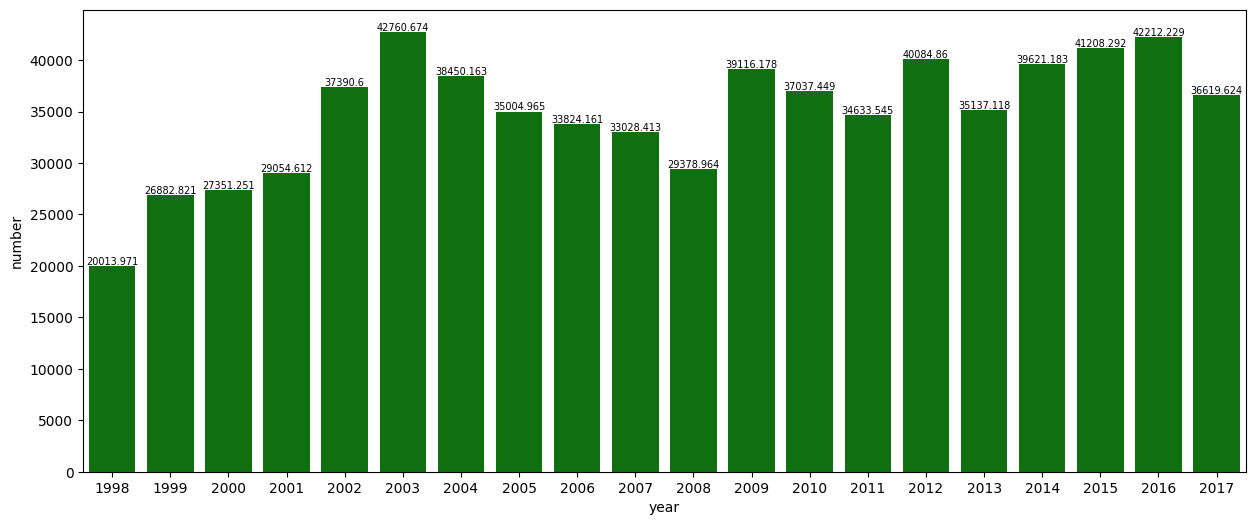

In [49]:
plt.figure(figsize=(15,6))
plot = sns.barplot(x='year', y='number', data =ano_max, color='g')
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=7,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')
plt.show()

In [50]:
v_maximo = ano_max.number.max()
max_do_ano = ano_max.year[5]
v_minimo = ano_max.number.min()
min_do_ano = ano_max.year[0]

In [51]:
print(f" O ano reportado com maior número de INCÊNDIO foi em {max_do_ano} com um total de {v_maximo} ")
print(f" Já o ano reportado com menor número de INCÊNDIO foi em {min_do_ano} com um total de {v_minimo} ")

 O ano reportado com maior número de INCÊNDIO foi em 2003 com um total de 42760.674 
 Já o ano reportado com menor número de INCÊNDIO foi em 1998 com um total de 20013.971 


In [52]:
#3) - Em que mês foi reportado o número máximo de incêndios florestais?

In [53]:
mes_max = dados.groupby('month')['number'].sum().reset_index()
mes_max

,month,number
0,Abril,28184.770
1,Agosto,88050.435
2,Dezembro,57535.480
3,Fevereiro,30839.050
4,Janeiro,47681.844
5,Julho,92319.113
6,Junho,55997.675
7,Maio,34725.363
8,Março,30709.405
9,Novembro,85508.054


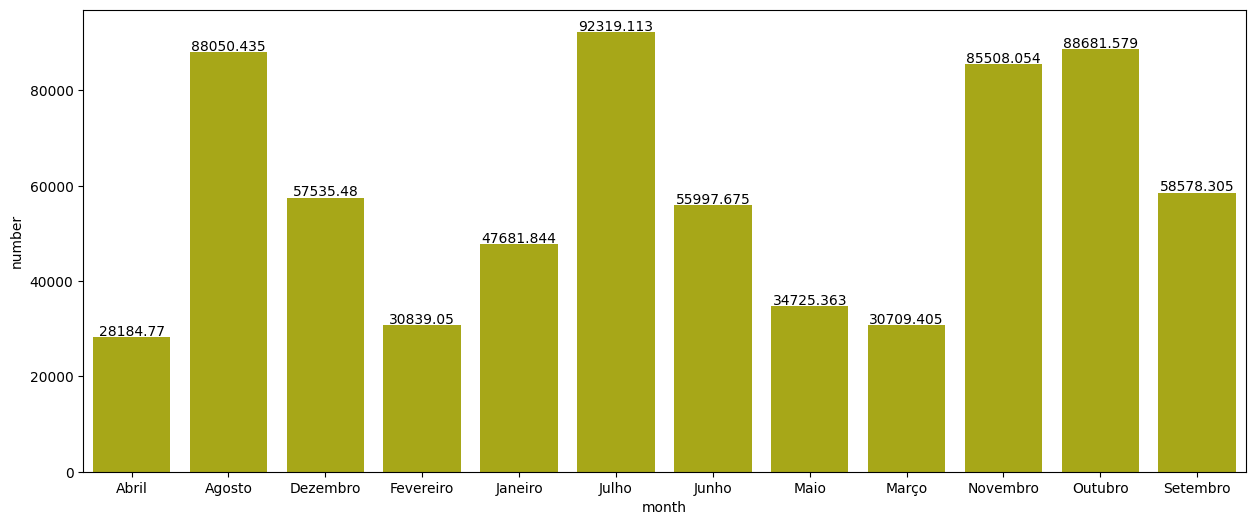

In [54]:
plt.figure(figsize=(15,6))
#sns.set_theme(style="whitegrid")
plot = sns.barplot(x='month', y='number', data = mes_max, color='y')
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=10,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')
plt.show()

In [56]:
max = mes_max.number.max()
mes = mes_max.month[5]
min = mes_max.number.min()
mes_min = mes_max.month[0]

In [57]:
print(f" O ano reportado com maior número de INCÊNDIO foi no mês de {mes} com um total de {max} ")
print(f" Já o ano reportado com menor número de INCÊNDIO foi em {mes_min} com um total de {min} ")

 O ano reportado com maior número de INCÊNDIO foi no mês de Julho com um total de 92319.113 
 Já o ano reportado com menor número de INCÊNDIO foi em Abril com um total de 28184.77 


In [58]:
#4) - Em que estado foi relatado o número máximo de incêndios florestais?

In [59]:
dados.state.unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [60]:
max_estados = dados.groupby('state')['number'].sum().reset_index()
max_estados

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


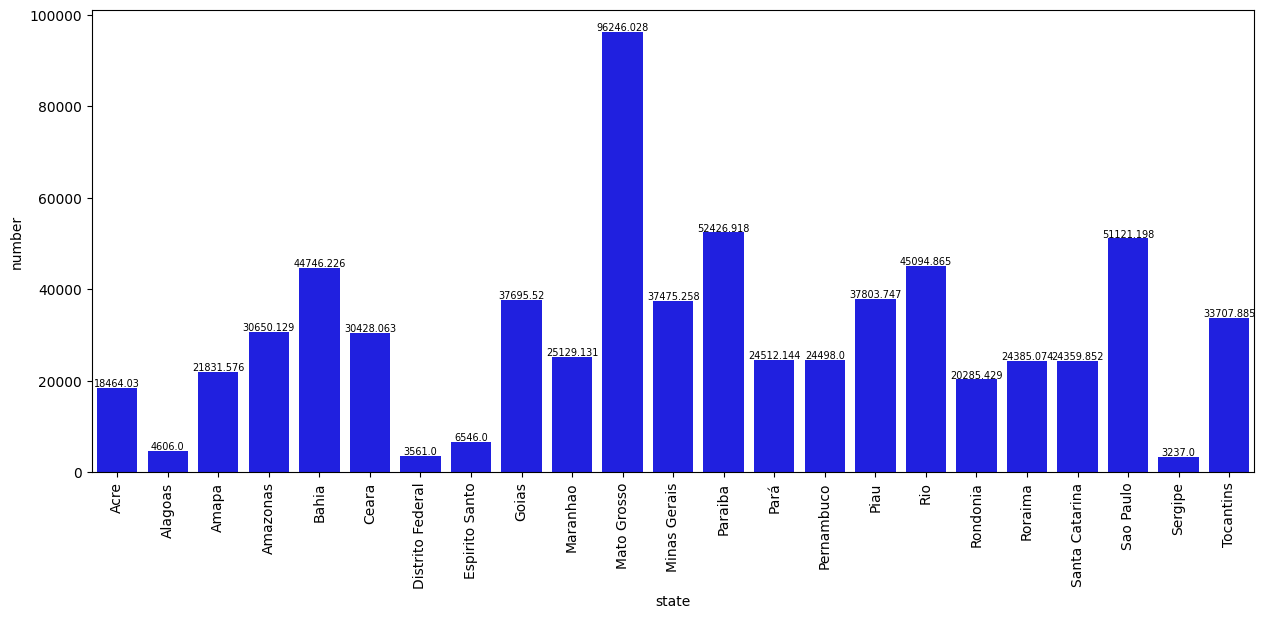

In [61]:
plt.figure(figsize=(15,6))
plot = sns.barplot(x='state', y='number', data =max_estados, color='b')
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=7,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')
plt.xticks(rotation=90)
plt.show()

In [62]:
vme = max_estados.number.max()
vmine = max_estados.number.min()

In [63]:
print(f" O Estado com maior número de relato de INCÊNDIO foi o {max_estados.state[10]} com um total de {vme} ")
print(f" Já o estado com relato de menor número de INCÊNDIO foi o {max_estados.state[21]} com um total de {vmine} ")

 O Estado com maior número de relato de INCÊNDIO foi no mês de Mato Grosso com um total de 96246.028 
 Já o estado com relato de menor número de INCÊNDIO foi o Sergipe com um total de 3237.0 


In [63]:
#5) - Apresente a diferença entre o número máximo e o mínimo de incêncio, reportado?

In [75]:
dif_incd = vme - vmine
print(f" A diferença entre o número máximo relatado e o mínimo foi de {dif_incd} INCÊNDIOS")

 A diferença entre o número máximo relatado e o mínimo foi de 93009.028 INCÊNDIOS


In [76]:
#6) - Encontre o número total de incêndios relatados no São Paulo

In [82]:
state_sp = dados[dados['state'] == 'Sao Paulo']['number'].sum()
print(f" O número Total de INCÊNDIOS relatodos no Estados de São Paulo foi de {state_sp}")

 O número Total de INCÊNDIOS relatodos no Estados de São Paulo foi de 51121.198000000004


In [ ]:
#7) - Exibir número de incêndios relatados no São Paulo (anualmente)

In [89]:
state_sp = dados[dados['state'] == 'Sao Paulo']
inc_anual_sp = state_sp.groupby('year')['number'].sum().reset_index()
inc_anual_sp

,year,number
0,1998,3196.000
1,1999,4249.211
2,2000,4128.000
3,2001,2926.000
4,2002,3539.000
5,2003,3306.000
6,2004,2864.000
7,2005,2123.000
8,2006,2209.000
9,2007,1877.000


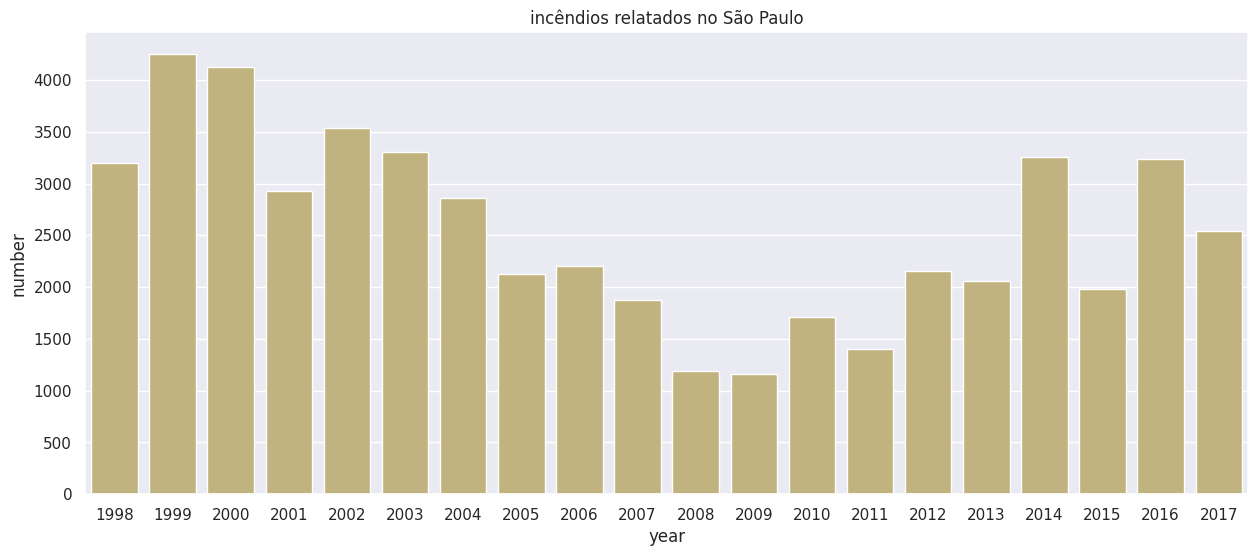

In [125]:
plt.figure(figsize=(15,6))
#sns.set_theme(style="whitegrid")
plot = sns.barplot(x='year', y='number', data = inc_anual_sp, color='y')
plt.title('incêndios relatados no São Paulo')
plt.show()

In [ ]:
#8) - Exibir número de incêndios relatados no São Paulo (diurno)

In [92]:
dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [98]:
dados_periodo = dados[dados['state'] == 'Sao Paulo']

In [108]:
day = dados_periodo.groupby(dados_periodo['date'].dt.dayofweek).sum().number
day.index = [calendar.day_name[x] for x in range(0, 7)]
print(f" Os INCÊNDIOS relatados em São Paulo no perido diurno são:\n{day}")

 Os INCÊNDIOS relatados em São Paulo no perido diurno são:
Monday       4803.000
Tuesday      6787.000
Wednesday    6566.458
Thursday     9209.000
Friday       9195.697
Saturday     7651.175
Sunday       6908.868
Name: number, dtype: float64


<ipython-input-108-046dcbc260d3>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
#9) - Encontre o número total de incêndios relatados em 2017 e visualize os dados com base em cada “mês”

In [109]:
relato_2017 = dados[dados['year'] == 2017].groupby('month')['number'].sum().reset_index()
relato_2017

,month,number
0,Abril,1559.000
1,Agosto,4120.410
2,Fevereiro,1400.000
3,Janeiro,2342.000
4,Julho,5929.998
5,Junho,4148.361
6,Maio,2506.000
7,Março,2017.000
8,Novembro,6217.379
9,Outubro,3600.159


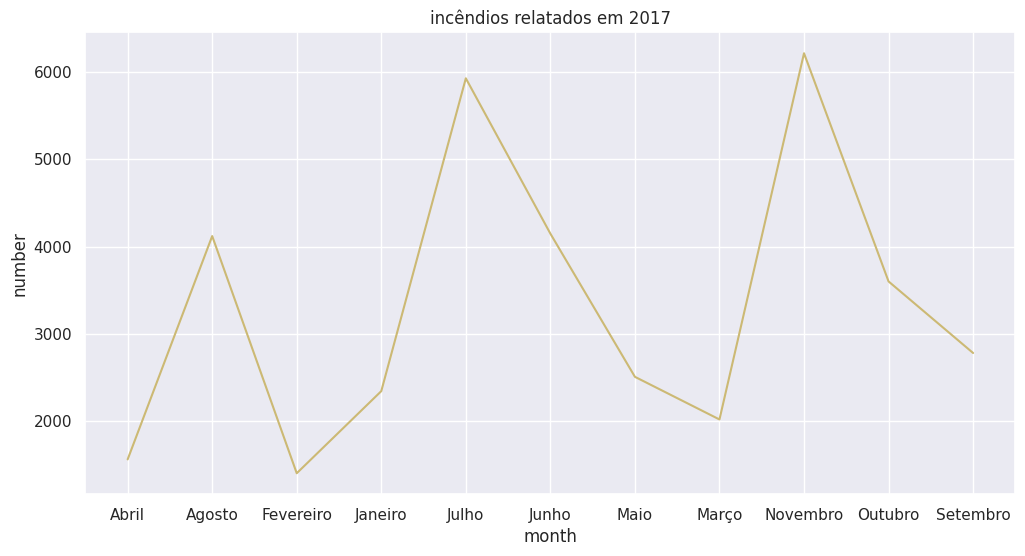

In [123]:
plt.figure(figsize=(12,6))
#plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")
plt.title('incêndios relatados em 2017')
sns.lineplot(data=relato_2017,x='month', y='number', color='y' )
plt.show()

In [ ]:
#10) - Encontre o número médio de incêndios relatados do maior para o menor (em termos de estado)

In [126]:
dados.columns

Index(['year', 'state', 'month', 'number', 'date'], dtype='object')

In [128]:
relato_medio = dados.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
relato_medio

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


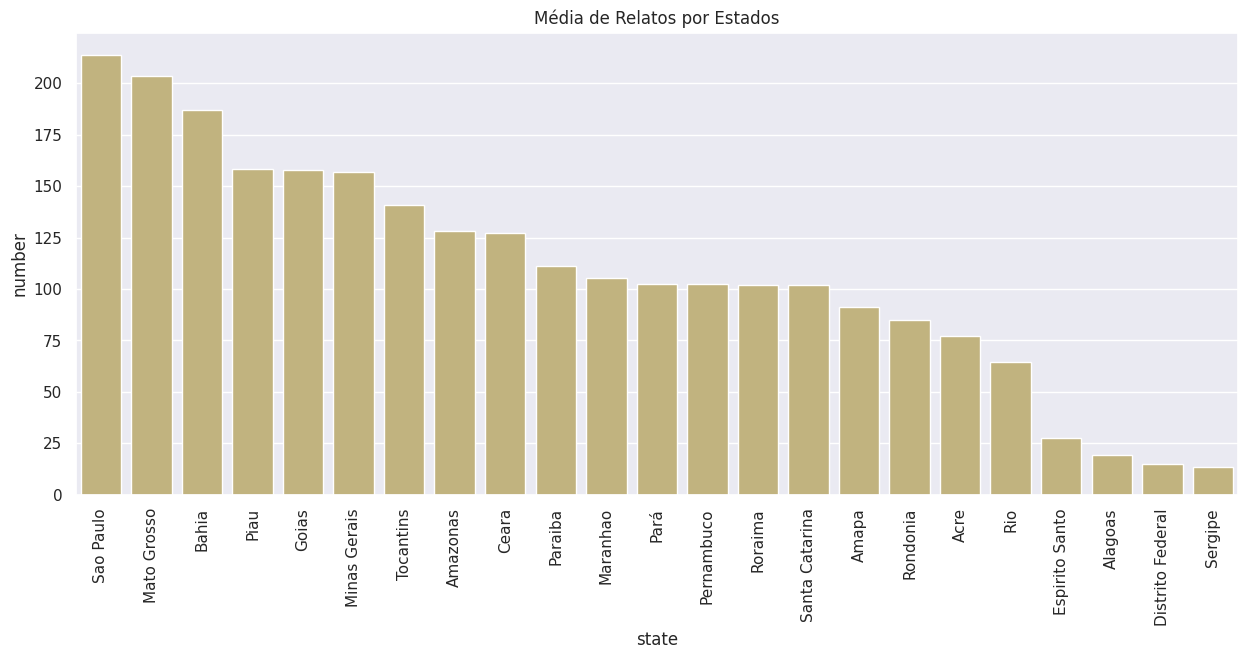

In [131]:
plt.figure(figsize=(15,6))
#sns.set_theme(style="whitegrid")
plt.xticks(rotation=90)
plot = sns.barplot(x='state', y='number', data = relato_medio, color='y')
plt.title('Média de Relatos por Estados')
plt.show()

In [ ]:
#11) - Encontre os estados com relatos de incêndios no mês de Dezembro

In [133]:
relato_dez = dados[dados['month'] == 'Dezembro']['state'].unique()
relato_dez

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)

In [143]:
dados_dez = pd.DataFrame(relato_dez)
print(f" Os Estados que relataram qualquer tipo de INCÊNDIO no mês de DEZEMBRO foram :\n{dados_dez}")

 Os Estados que relataram qualquer tipo de INCÊNDIO no mês de DEZEMBRO foram :
                   0
0               Acre
1            Alagoas
2              Amapa
3           Amazonas
4              Bahia
5              Ceara
6   Distrito Federal
7     Espirito Santo
8              Goias
9           Maranhao
10       Mato Grosso
11      Minas Gerais
12              Pará
13           Paraiba
14        Pernambuco
15              Piau
16               Rio
17          Rondonia
18           Roraima
19    Santa Catarina
20         Sao Paulo
21           Sergipe
22         Tocantins
